In [1]:
import os, sys
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
import matplotlib as mpl

import cartopy.feature as cfeature

In [2]:
gridFile = '../configs/Arctic6/roms/grid_Arctic_6.nc'

In [3]:
if os.path.isfile(gridFile):
    ds_disk = xr.open_dataset(gridFile)
else:
    ds_disk = xr.Dataset()

In [4]:
ds_disk = ds_disk.set_coords(['lat_rho', 'lon_rho'])
ds_disk

<xarray.Dataset>
Dimensions:    (bath: 2, eta_psi: 1393, eta_rho: 1394, eta_u: 1394, eta_v: 1393, two: 2, xi_psi: 1081, xi_rho: 1082, xi_u: 1081, xi_v: 1082)
Coordinates:
    lat_rho    (eta_rho, xi_rho) float64 ...
    lon_rho    (eta_rho, xi_rho) float64 ...
Dimensions without coordinates: bath, eta_psi, eta_rho, eta_u, eta_v, two, xi_psi, xi_rho, xi_u, xi_v
Data variables: (12/45)
    xl         float64 ...
    el         float64 ...
    JPRJ       (two) |S1 ...
    PLAT       (two) float64 ...
    PLONG      float64 ...
    ROTA       float64 ...
    ...         ...
    mask_rho   (eta_rho, xi_rho) float64 ...
    mask_u     (eta_u, xi_u) float64 ...
    mask_v     (eta_v, xi_v) float64 ...
    mask_psi   (eta_psi, xi_psi) float64 ...
    angle      (eta_rho, xi_rho) float64 ...
    h_mask     (eta_rho, xi_rho) float64 ...
Attributes:
    type:                       Gridpak file
    gridid:                     Arctic #6
    history:                    Thu Mar 11 14:29:34 2021: ncks -A -v mask_rho...
    CPP-options:                 DCOMPLEX, DBLEPREC, ELLIPSOID,
    history_of_appended_files:  Thu Mar 11 14:29:34 2021: Appended file grid_...
    NCO:                        "4.6.1"

In [5]:
elevLev = [-50.0, -40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0]

/home/cermak/miniconda3/envs/xesmfTools/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1599: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


Text(0.5, 1.0, 'ROMS(h)')

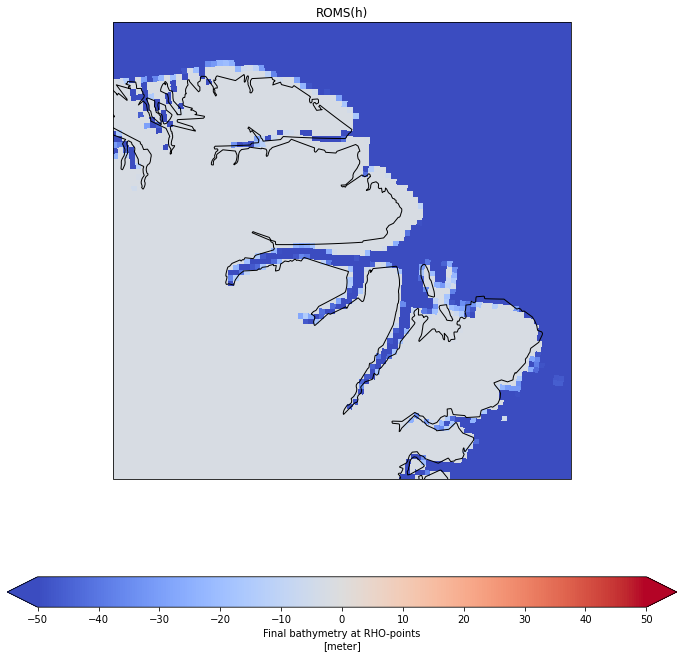

In [6]:
proj = ccrs.LambertConformal(central_longitude=-13.8)
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=proj)
ax.set_extent([-37.5, -9.9, 80.0, 84.0])

cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=50, vmax=-50)

bathy = -(ds_disk.h)

bathy.plot(x='lon_rho', y='lat_rho', transform=ccrs.PlateCarree(), norm=norm, cmap=cmap, cbar_kwargs={'ticks': elevLev, 'orientation': 'horizontal'})

#coast_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
#                                        edgecolor='k', facecolor='0.8')
#ax.add_feature(coast_10m)
ax.coastlines(resolution='10m')
ax.set_title('ROMS(h)')

/home/cermak/miniconda3/envs/xesmfTools/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1599: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


Text(0.5, 1.0, 'ROMS(h_mask)')

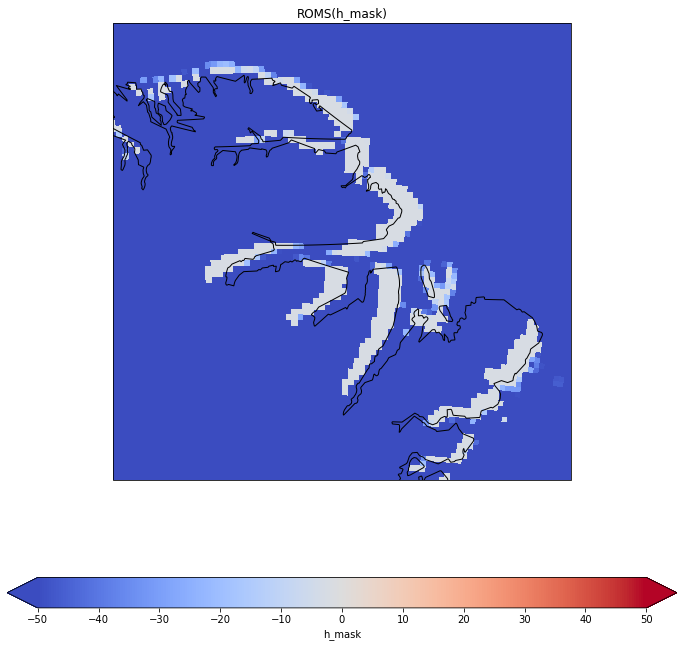

In [7]:
proj = ccrs.LambertConformal(central_longitude=-13.8)
fig = plt.figure(figsize=(12, 12))

ax = plt.axes(projection=proj)
ax.set_extent([-37.5, -9.9, 80.0, 84.0])

cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=50, vmax=-50)

bathy = -(ds_disk.h_mask)

bathy.plot(x='lon_rho', y='lat_rho', transform=ccrs.PlateCarree(), norm=norm, cmap=cmap, cbar_kwargs={'ticks': elevLev, 'orientation': 'horizontal'})

ax.coastlines(resolution='10m')
ax.set_title('ROMS(h_mask)')

In [8]:
ax.figure.colorbar(orientation='horizonal')

TypeError: colorbar() missing 1 required positional argument: 'mappable'